---
title: Métodos de volúmenes finitos para ecuaciones hiperbólicas
subtitle: Example
author:
  - name: Rowan Cockett
    affiliations: Executable Books; Curvenote
    orcid: 0000-0002-7859-8394
    email: rowan@curvenote.com
license:
  code: MIT
date: 2024/12/24
---

<https://rodin.uca.es/handle/10498/24890>

In [120]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, FuncAnimation
from tqdm.notebook import tqdm

# 1 Introducción

Los métodos de volúmenes finitos son técnicas del análisis numérico el cual surgen de la discretización de una EDP en su forma conservativa.

# 2 Fundamentos básicos

## 2.1 Ley de conservación

Una ley de conservación unidimensional es

$$
U_{t}+
{\left(f\left(U\right)\right)}_{x}
=0
$$

## 2.2 Sistemas lineales de leyes de conservación hiperbólicas

$$
U_{t}+
AU_{x}=
0
$$

## 2.3 Problema de Cauchy

Si $c\in\mathbb{R}$ y $f\left(U\right)=cU$, entonces $U=U_{0}\left(x-ct\right)$.

## 2.4 Problema de Riemann

$$
U_{0}\left(x\right)=
\begin{cases}
U_{\text{L}}, & x<x_{0},\\
U_{\text{R}}, & x>x_{0}.
\end{cases}
$$

donde $U_{\text{L}}<U_{\text{R}}$.

La solución

$$
U=\begin{cases}
U_{\text{L}}, & x-ct<x_{0},\\
U_{\text{R}}, & x-ct>x_{0}.\\
\end{cases}
$$

## 2.5 Velocidad de propagación en algunos problemas evolutivos

### 2.5.1 Problemas parabólicos

$$
U_{t}-\Delta U=0, x\in\Omega\subset{R}^{n}, t>0
$$

### 2.5.2 Problemas hiperbólicos

$$
U_{tt}-\Delta U=0, x\in\Omega\subset{R}^{n}, t>0
$$

## 3 Métodos de Volúmenes Finitos

Métodos descentrados de primer orden.

### 3.1 Método de Volúmenes Finitos

$$
U^{n+1}_{i}=U^{n}_{i}-\frac{\Delta t}{\Delta x}\left(F^{n}_{i+\frac{1}{2}}-F^{n}_{i-\frac{1}{2}}\right),
$$

$$
F^{n}_{i+\frac{1}{2}}\approx
\frac{1}{\Delta x}
\int^{t^{n+1}}_{t_{n}}
f
\left(
U
\left(x_{i+\frac{1}{2}},t\right)
\right)
\,\mathrm{d}t
$$

$$
\frac{U^{n+1}_{i}-U^{n}_{i}}{\Delta t}+
\frac{F^{n}_{i+\frac{1}{2}}-F^{n}_{i-\frac{1}{2}}}{\Delta x}=
0.
$$

$$
U^{n+1}_{i}=
U^{n}_{i}-
\frac{\Delta t}{\Delta x}
\left(\phi\left(U^{n}_{i},U^{n}_{i+1}\right)-\phi\left(U^{n}_{i-1},U^{n}_{i}\right)\right).
$$

El método de volúmenes finitos es conservativo.

### 3.2 Métodos descentrados

#### 3.2.1 Método descentrado upwind

Si $c>0$,

$$
U^{n+1}_{i}=
U^{n}_{i}-
\frac{c\Delta t}{\Delta x}
\left(U^{n}_{i}-U^{n}_{i-1}\right).
$$

El flujo numérico a lo largo de la recta $x=x_{i-\frac{1}{2}}$ es

$$
F^{n}_{i-\frac{1}{2}}=
cU^{n}_{i-1}.
$$

El flujo numérico a lo largo de la recta $x=x_{i+\frac{1}{2}}$ es

$$
F^{n}_{i+\frac{1}{2}}=
cU^{n}_{i}.
$$

#### 3.2.1 Método descentrado downwind

Si $c<0$,

$$
U^{n+1}_{i}=
U^{n}_{i}-
\frac{c\Delta t}{\Delta x}
\left(U^{n}_{i+1}-U^{n}_{i}\right).
$$

$F^{n}_{i+\frac{1}{2}}=cU^{n}_{i+1}$,
$F^{n}_{i-\frac{1}{2}}=cU^{n}_{i}$.

### 3.3 Método de Godunov

#### 3.3.1 Primera versión

$$
\widetilde{U}
\left(x,t_{n}\right)=
U^{n}_{i}
$$

$$
\widetilde{U}
\left(x_{i-\frac{1}{2}},t_{n+1}\right)
$$

$$
\widetilde{U}
\left(x_{i+\frac{1}{2}},t_{n+1}\right)
$$

$$
U^{n+1}_{i}=
\frac{1}{\Delta x}
\int_{x_{i-\frac{1}{2}}}^{x_{i}}
\widetilde{U}
\left(x_{i-\frac{1}{2}},t_{n+1}\right)\,\mathrm{d}x+
\frac{1}{\Delta x}\int_{x_{i}}^{x_{i+\frac{1}{2}}}
\widetilde{U}\left(x_{i+\frac{1}{2}},t_{n+1}\right)\,\mathrm{d}x
$$

#### 3.3.2 Segunda versión

$$
F^{n}_{i+\frac{1}{2}}\approx
\frac{1}{\Delta t}
\int_{t_{n}}^{t_{n+1}}
f\left(U\left(x_{i+\frac{1}{2}},t\right)\right)\,\mathrm{d}t
$$

# 4 Convergencia, precisión y estabilidad

$$
\left\|E^{n}\right\|=
{\left(\Delta x\sum_{i=-\infty}^{+\infty}{\left|E^{n}_{i}\right|}^{2}\right)}^{\frac{1}{2}}
$$

$$
\lim\limits_{\Delta t\to 0}
{\left\|E^{n}\right\|}_{2}=
0
$$

$$
{\left\|E^{n}\right\|}_{2}=
\mathcal{O}
\left(\Delta t^{s}\right),
\text{ cuando }
\Delta t\to 0.
$$

**Upwind**

$$
U^{n+1}_{i}=
U^{n}_{i}-
c\frac{\Delta t}{\Delta x}
\left(U^{n}_{i}-U^{n}_{i-1}\right).
$$

**Downwind**

$$
U^{n+1}_{i}=
U^{n}_{i}-
c\frac{\Delta t}{\Delta x}
\left(U^{n}_{i+1}-U^{n}_{i}\right).
$$

**FTCS**

$$
U^{n+1}_{i}=
U^{n}_{i}-
c\frac{\Delta t}{2\Delta x}
\left(U^{n}_{i+1}-U^{n}_{i-1}\right).
$$

**Lax-Friedrichs**

$$
U^{n+1}_{i}=
\frac{1}{2}
\left(U^{n}_{i+1}+U^{n}_{i-1}\right)-
c\frac{\Delta t}{2\Delta x}
\left(U^{n}_{i+1}-U^{n}_{i-1}\right).
$$

**Lax-Wendroff**

$$
U^{n+1}_{i}=
U^{n}_{i}-
c\frac{\Delta t}{2\Delta x}
\left(U^{n}_{i+1}-U^{n}_{i-1}\right)+
c^{2}
\frac{\Delta t^{2}}{2\Delta x^{2}}
\left(U^{n}_{i+1}-2U^{n}_{i}+U^{n}_{i-1}\right).
$$

$$
U^{n+1}=
\mathcal{N}
\left(U^{n}\right)
$$

## 4.2 Error de truncamiento local y consistencia

$$
\tau^{n}=
\frac{1}{\Delta t}
\left(
\mathcal{N}
\left(U^{n}\right)-
\hat{U}^{n+1}
\right).
$$

$$
\lim_{\Delta t\to 0}
\max_{0\leq n\leq N-1}
\left|\tau^{n}\right|=
0.
$$

$$
\tau^{n}=
\mathcal{O}\left(\Delta^{s}\right)
$$

## 4.3 Estabilidad

$$
\left\|U^{n}\right\|^{2}_{2}\leq
K
\left\|U^{0}\right\|^{2}_{2}.
$$

### 4.3.1 Condición CFL

$$
\left|
c\frac{\Delta t}{\Delta x}
\right|\leq 1
$$

### 4.3.2 Análisis de Estabilidad de Von Neumann

$$
\left|
g\left(\xi\Delta x\right)^{n}
\right|\leq
1
$$

# 5 Simulaciones numéricas

Introducimos las condiciones de contorno.

## 5.1 Condiciones de contorno

Extender el dominio computacional para incluir celdas en cada extremo, estas se llaman las celdas fantasmas.

Las condiciones de contorno periódicas,

- Si $c>0$, $U^{n}_{0}=U^{n}_{N}$.
- Si $c<0$, $U^{n}_{N+1}=U^{n}_{1}$.

$$
\frac{\partial U}{\partial n}=0,\text{ para }x\in\partial\Omega.
$$

## 5.2 Lenguaje de programación Julia

```jl
               _
   _       _ _(_)_     |  Documentation: https://docs.julialang.org
  (_)     | (_) (_)    |
   _ _   _| |_  __ _   |  Type "?" for help, "]?" for Pkg help.
  | | | | | | |/ _` |  |
  | | |_| | | | (_| |  |  Version 1.11.2 (2024-12-01)
 _/ |\__'_|_|_|\__'_|  |  
|__/                   |

julia>
```

## 5.3 Test numéricos

## 5.3.1 Primeros test

$$U_{t}+cU_{x}=0,\quad x\in\mathbb{R},\quad t>0$$

**Ejemplo $1$**

$\Omega=\left[0,20\right]$, $\Delta x=0.1$, $\Delta t=0.02$, $c=-1$.

$$
U_{0}\left(x\right)=e^{-{\left(x-15\right)}^{2}}
$$

In [121]:
plt.style.use("seaborn-v0_8-white")

In [122]:
def U(x):
    return np.exp(-np.power(x - 15, 2))

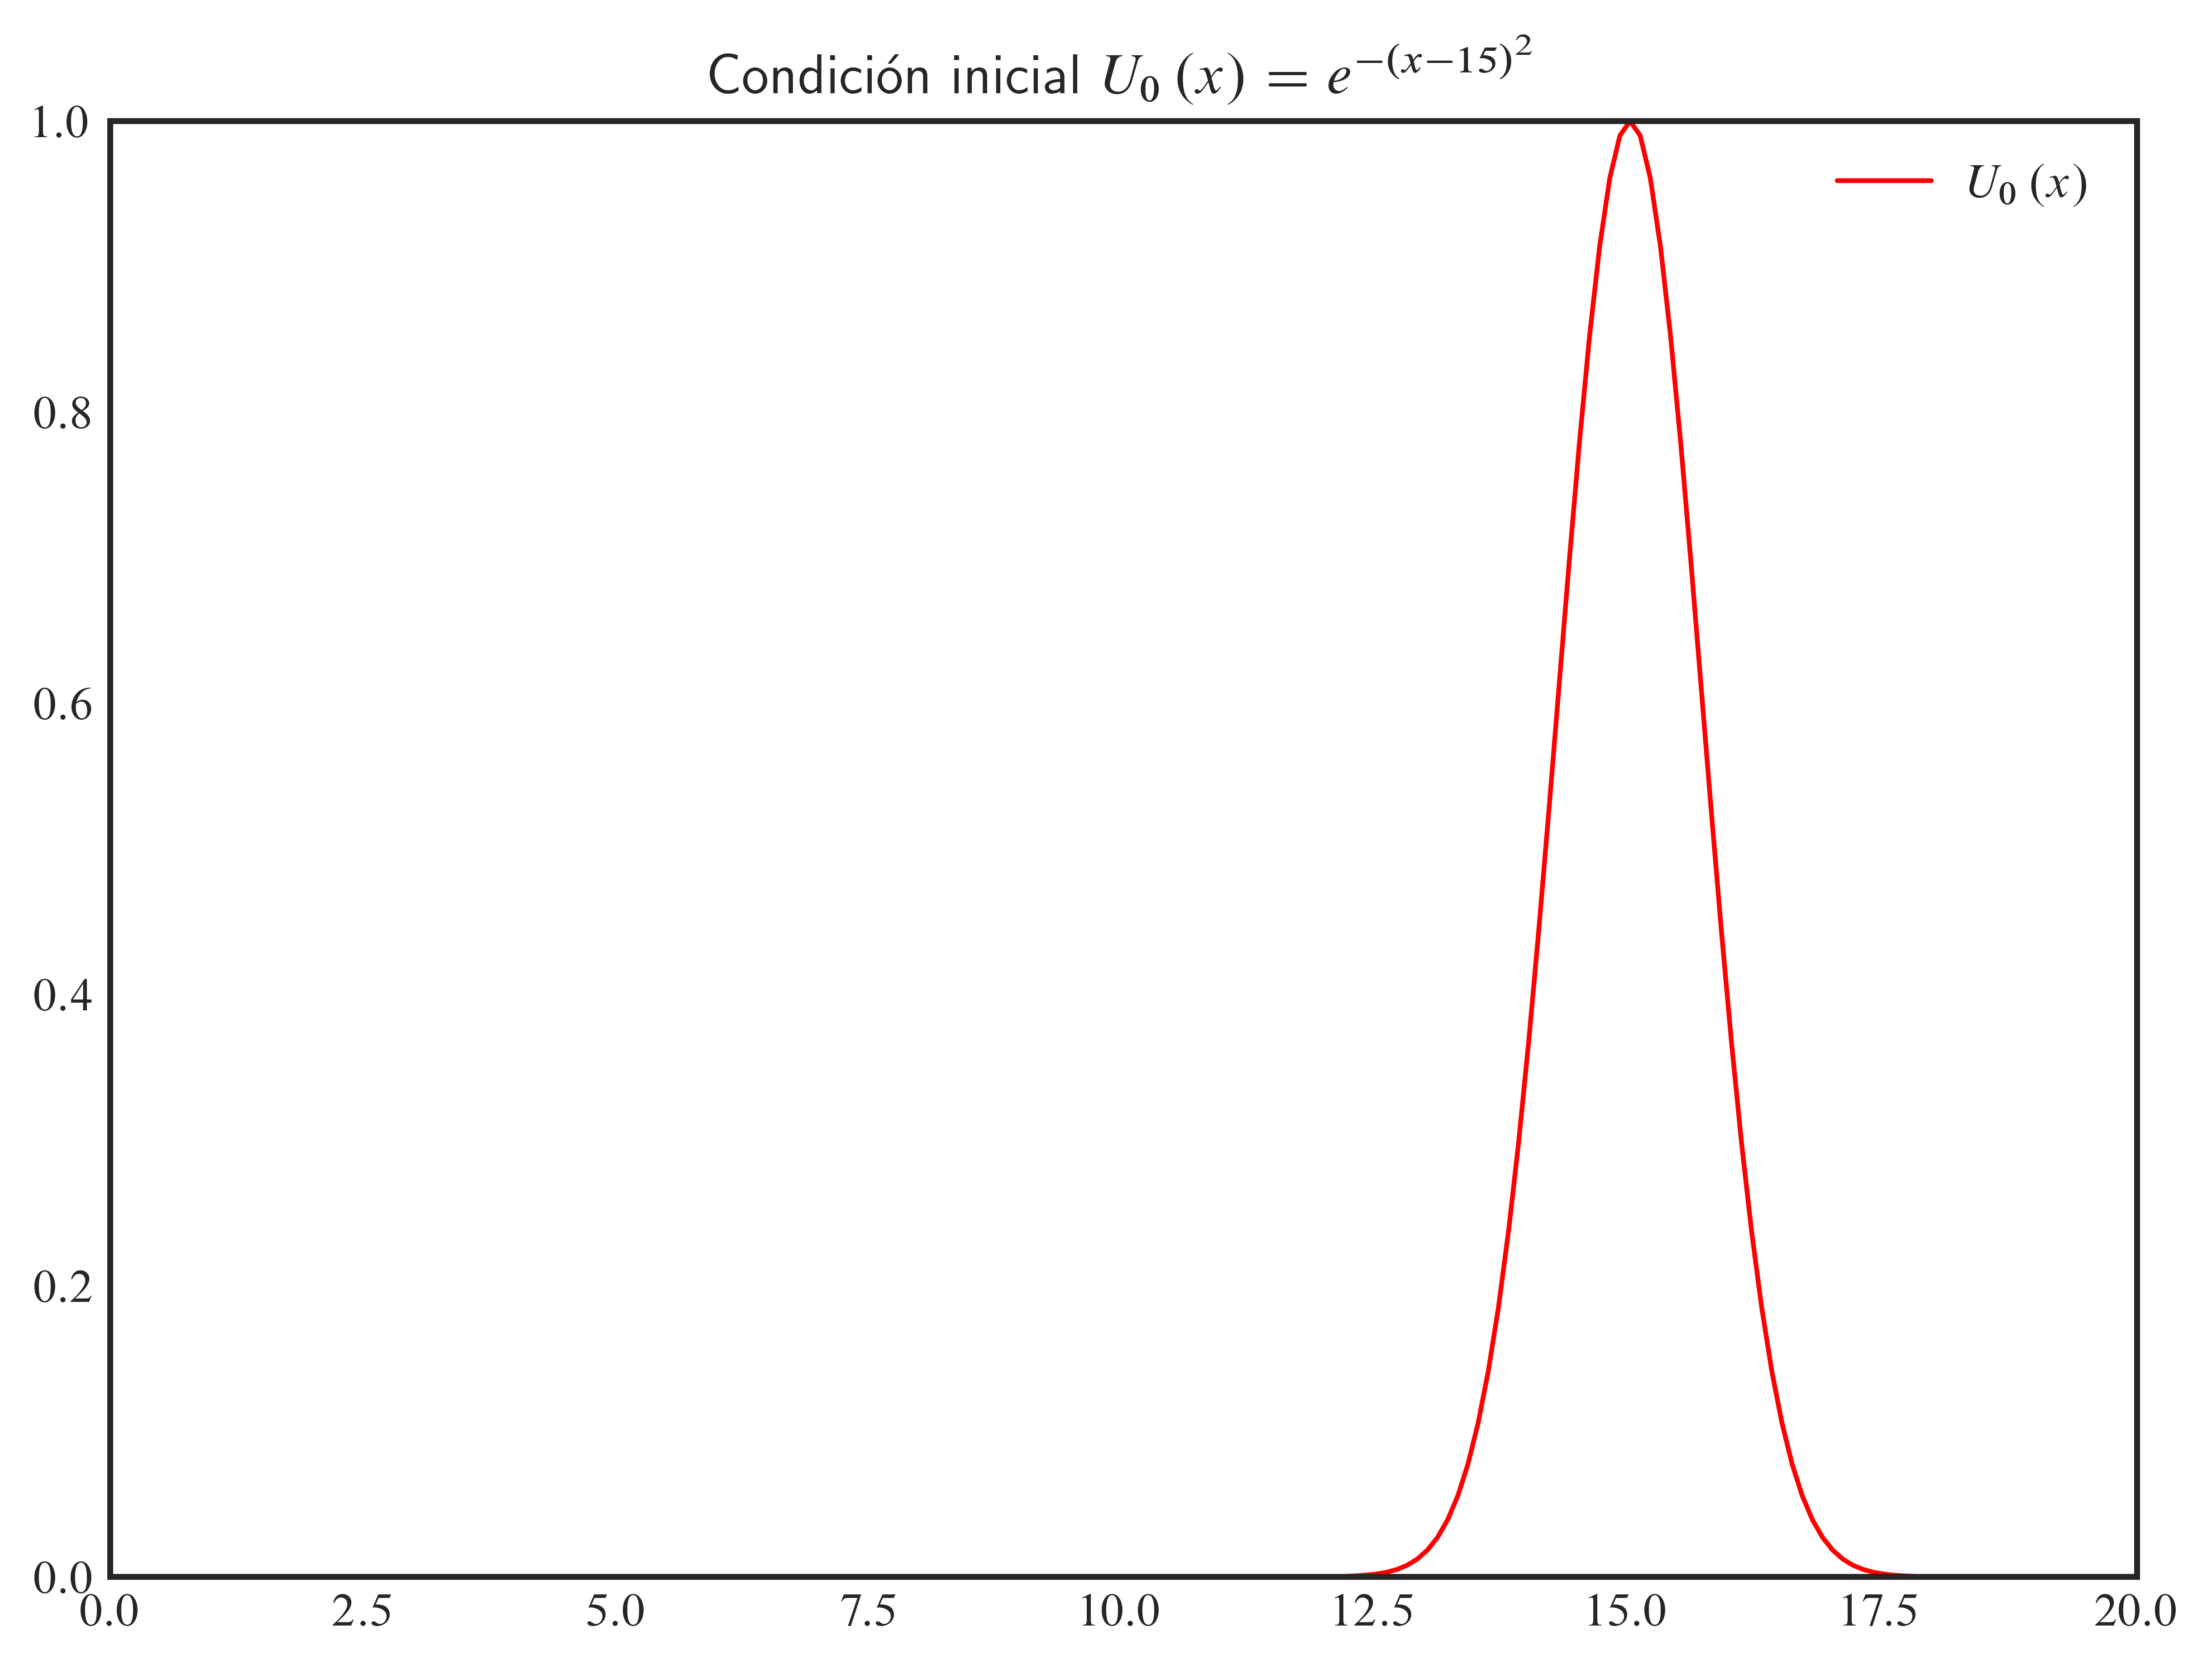

In [123]:
fig, ax = plt.subplots(layout="constrained")
ax.plot(
    x,
    U(x),
    color="red",
    label=r"$U_{0}\left(x\right)$",
    linestyle="solid",
    linewidth=1.0,
)
ax.set_title(
    label=r"Condición inicial $U_{0}\left(x\right)=e^{-{\left(x-15\right)}^{2}}$",
    loc="center",
)
ax.set_xlim(left=x[0], right=x[-1])
ax.set_ylim(bottom=0, top=1)
ax.legend(loc="best")

**Solución exacta**

  0%|          | 0/51 [00:00<?, ?it/s]

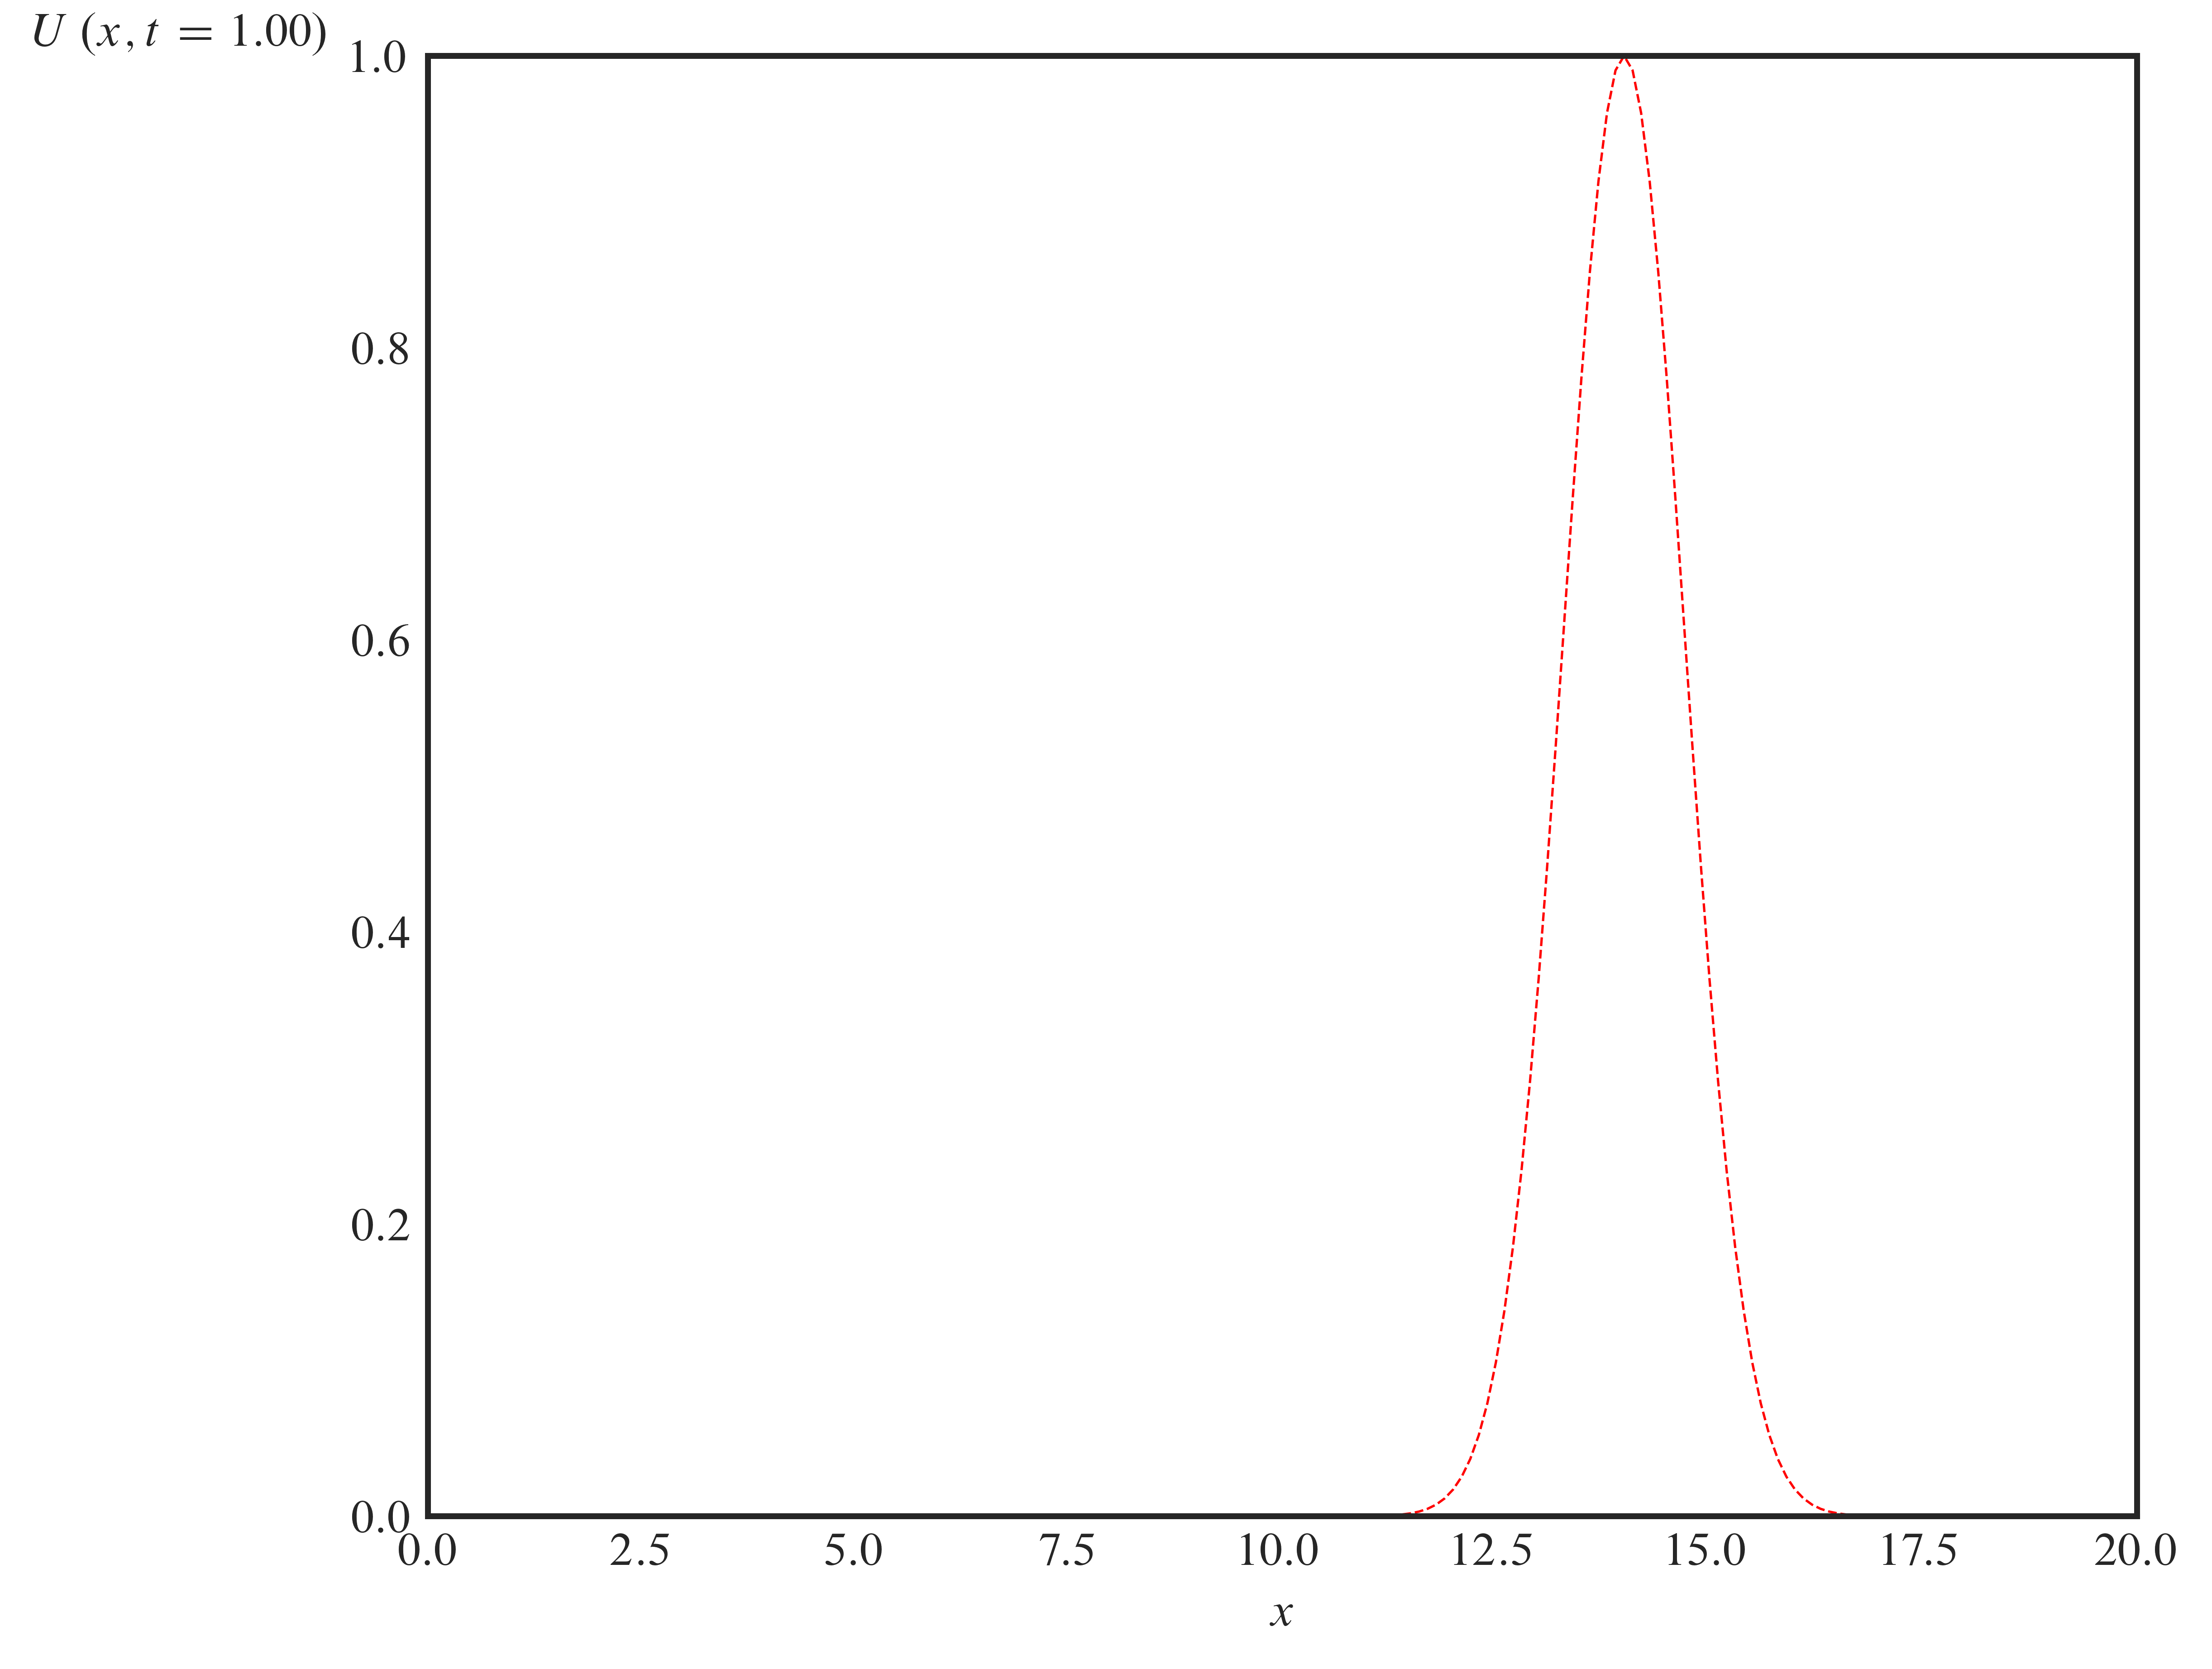

In [124]:
fig, ax = plt.subplots(layout="constrained")
(ln,) = ax.plot(
    [],
    [],
    color="red",
    label="Exacta",
    linestyle="dashed",
    linewidth=0.5,
)
ax.set_xlabel(xlabel=r"$x$")
ax.set_xlim(left=x[0], right=x[-1])
ax.set_ylim(bottom=0, top=1)


def init():
    ln.set_data(x, U(x))

    return (ln,)


def update(frame):
    ln.set_data(x, U(x=x - c * (t[0] + frame * Δt)))
    ax.set_ylabel(
        ylabel=rf"$U\left(x, t={frame * Δt:.2f}\right)$", loc="top", rotation=0
    )

    return (ln,)


anim = FuncAnimation(
    fig=fig,
    func=update,
    frames=tqdm(iterable=range(t.size), file=sys.stdout, colour="green"),
    interval=1,
    init_func=init,
    blit=True,
).save(
    filename="exact.gif",
    writer=FFMpegWriter(
        fps=90,
        codec="libx265",
        metadata={
            "subject": "Numerical Analysis",
            "title": "Exact solution",
            "author": "Gloria Almozara Sainz",
            "genre": "Mathematics",
            "copyright": "2025",
            "srcform": "Matplotlib 3.9.3",
            "comment": "Numerical Simulation for advection PDE",
        },
    ),
    dpi=300,
    savefig_kwargs={"transparent": True, "facecolor": "none"},
);

![](exact.gif)

### Método Downwind

$$
U^{n+1}_{i}=
U^{n}_{i}-
c\frac{\Delta t}{\Delta x}
\left(U^{n}_{i+1}-U^{n}_{i}\right).
$$

In [125]:
x, Δx = np.linspace(start=0, stop=20, num=201, retstep=True)
t, Δt = np.linspace(start=0, stop=1, num=51, retstep=True)
c = -1
cfl = c * Δt / Δx

  0%|          | 0/51 [00:00<?, ?it/s]

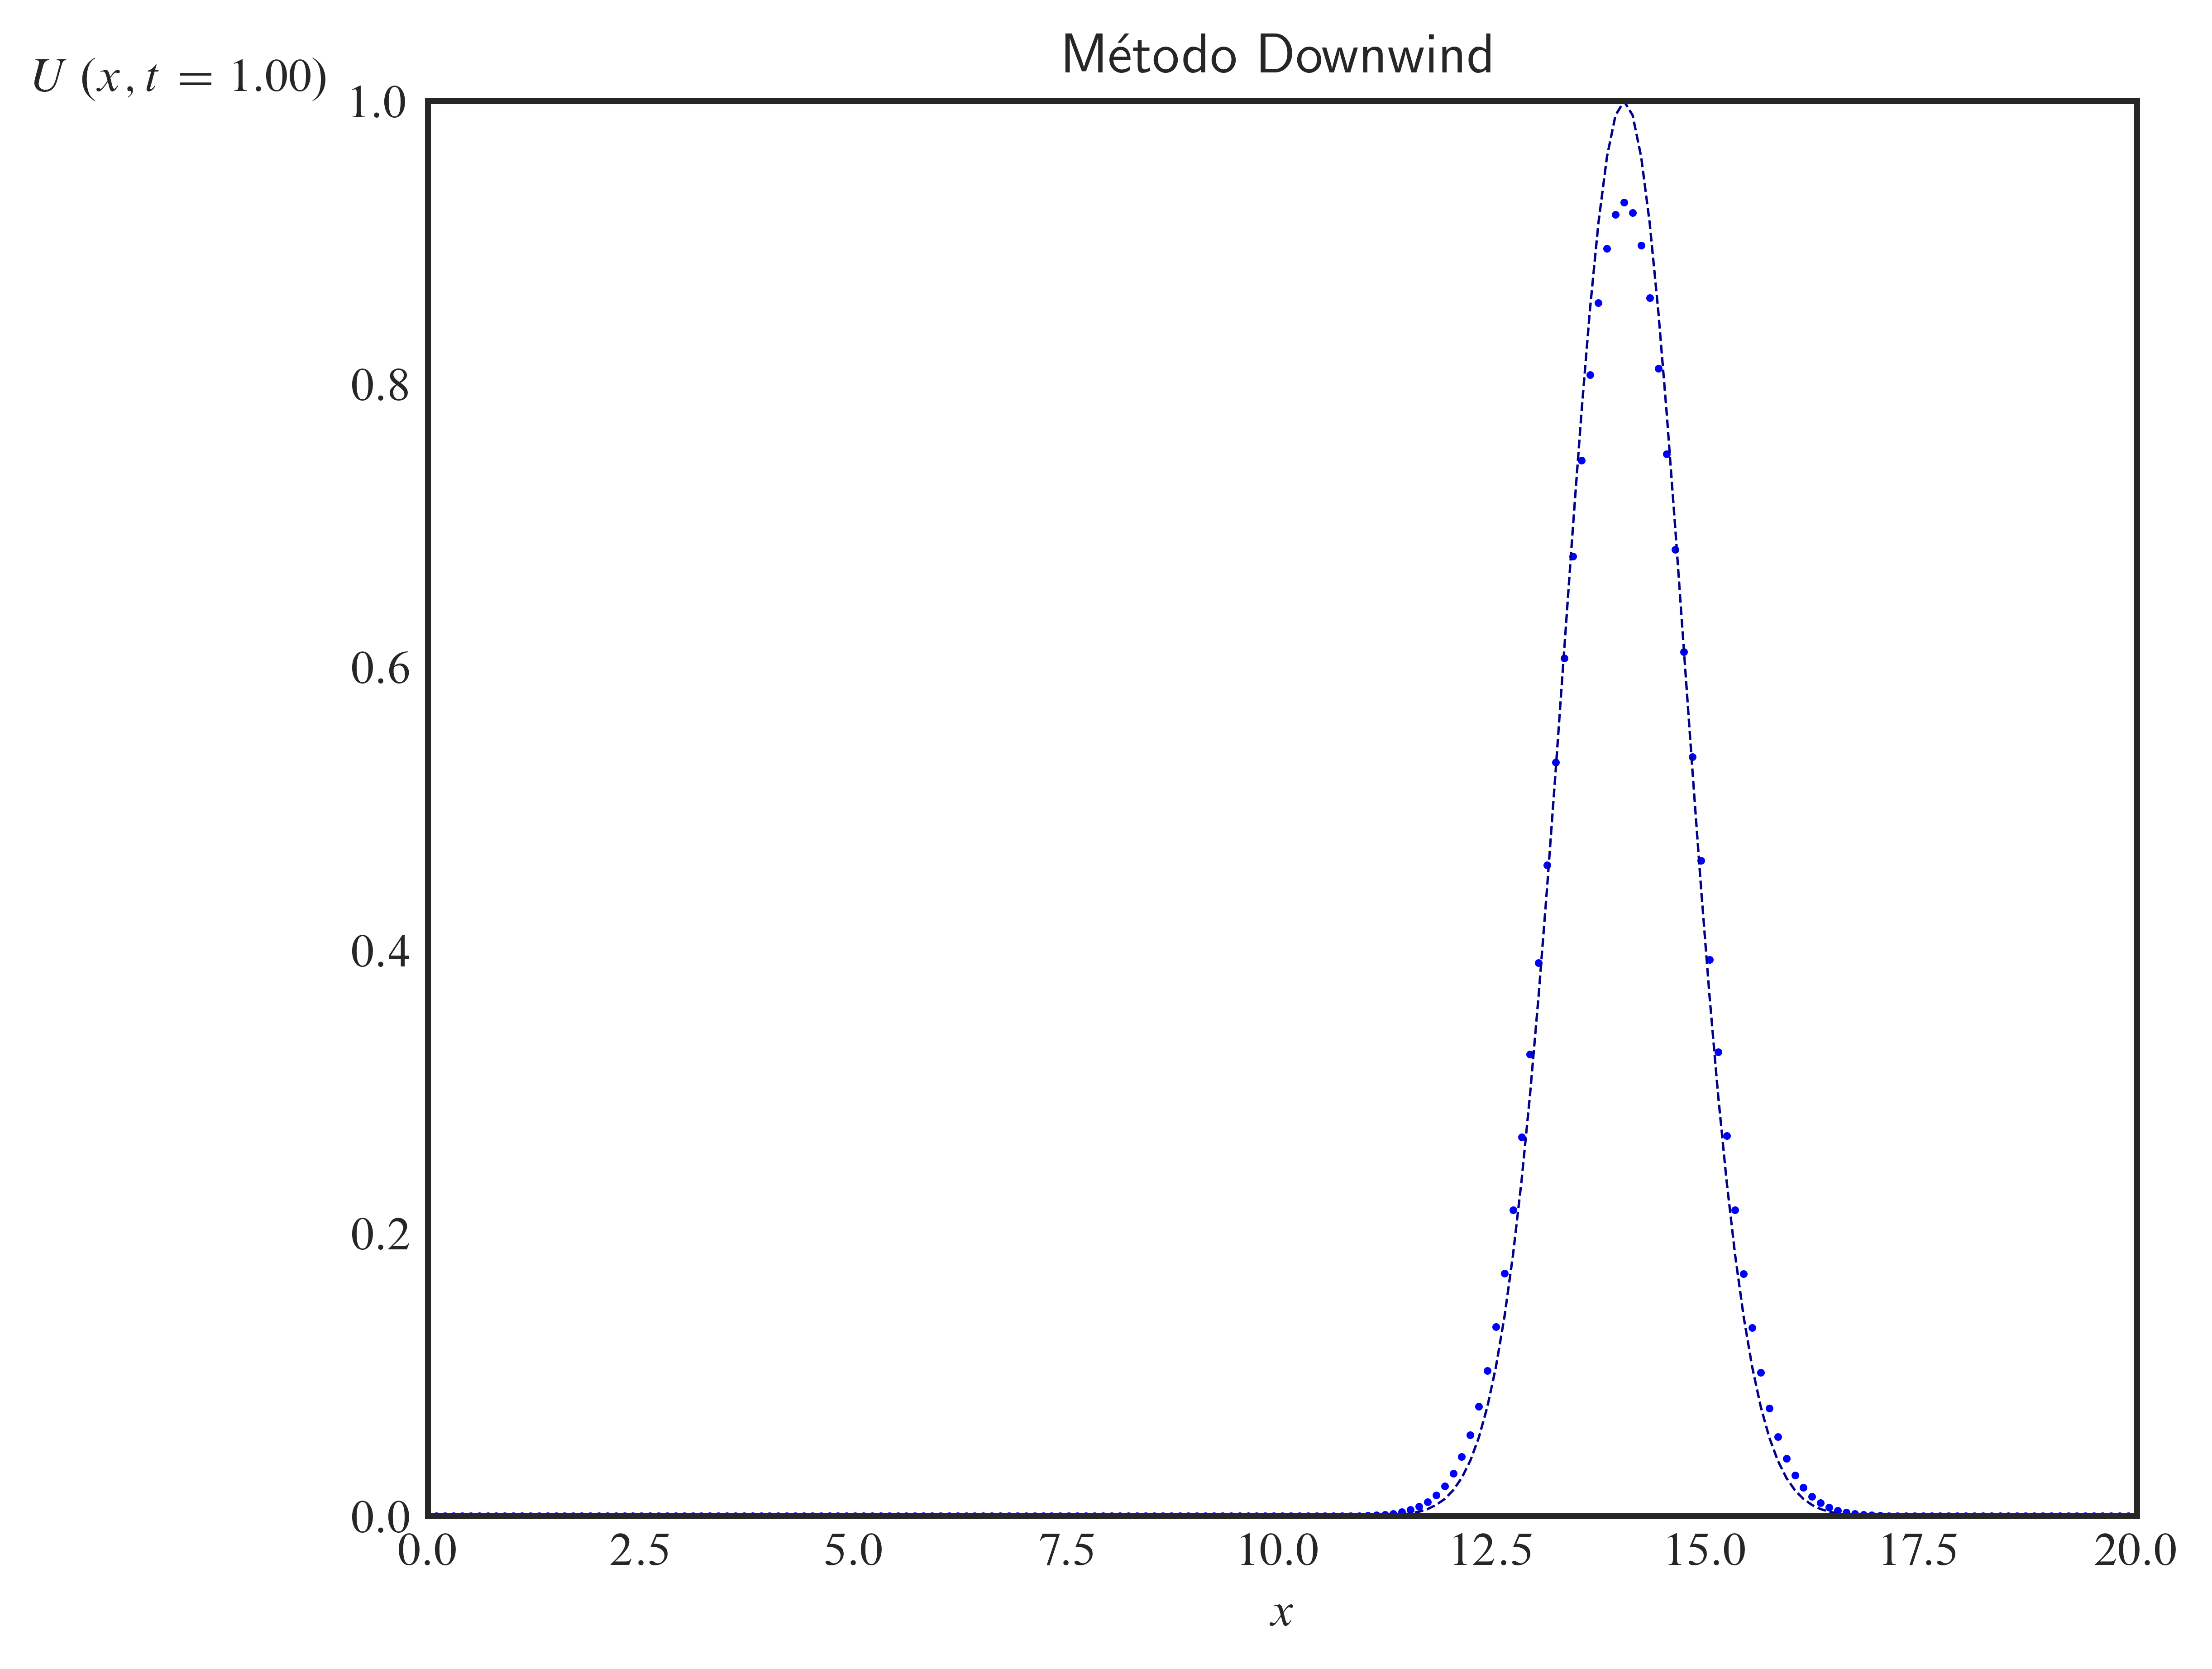

In [126]:
fig, ax = plt.subplots(layout="constrained")

(ln,) = ax.plot(
    [],
    [],
    color="DarkBlue",
    label="Exacta",
    linestyle="dashed",
    linewidth=0.5,
)

ln1 = ax.scatter(
    x=[],
    y=[],
    c="blue",
    label=rf"$\operatorname{{Co}}={cfl:.1f}$, $\Delta x={Δx:.3f}$",
    s=0.4,
)
ax.set_xlabel(xlabel=r"$x$")
ax.set_xlim(left=x[0], right=x[-1])
ax.set_ylim(bottom=0, top=1)
ax.set_title(label="Método Downwind", loc="center")

U1 = U(x=x)


def init():
    ln.set_data(x, U(x))
    ln1.set_offsets(offsets=np.column_stack([x, U1]))

    return (ln,)


def update(frame):
    ln1.set_offsets(offsets=np.column_stack([x, U1]))
    ln.set_data(x, U(x=x - c * frame * Δt))
    U1[1:] -= cfl * (np.roll(U1, -1) - U1)[1:]
    ax.set_ylabel(
        ylabel=rf"$U\left(x, t={frame * Δt:.2f}\right)$", loc="top", rotation=0
    )

    return (ln,)


anim = FuncAnimation(
    fig=fig,
    func=update,
    frames=tqdm(iterable=range(t.size), file=sys.stdout, colour="green"),
    interval=1,
    init_func=init,
    blit=True,
).save(
    filename="downwind.gif",
    writer=FFMpegWriter(
        fps=90,
        codec="libx265",
        metadata={
            "subject": "Numerical Analysis",
            "title": "Exact solution",
            "author": "Gloria Almozara Sainz",
            "genre": "Mathematics",
            "copyright": "2025",
            "srcform": "Matplotlib 3.9.3",
            "comment": "Numerical Simulation for advection PDE",
        },
    ),
    dpi=300,
    savefig_kwargs={"transparent": True, "facecolor": "none"},
)

![](downwind.gif)

### Método Lax-Friedrichs

$$
U^{n+1}_{i}=
\frac{1}{2}
\left(U^{n}_{i+1}+U^{n}_{i-1}\right)-
c\frac{\Delta t}{2\Delta x}
\left(U^{n}_{i+1}-U^{n}_{i-1}\right).
$$

  0%|          | 0/51 [00:00<?, ?it/s]

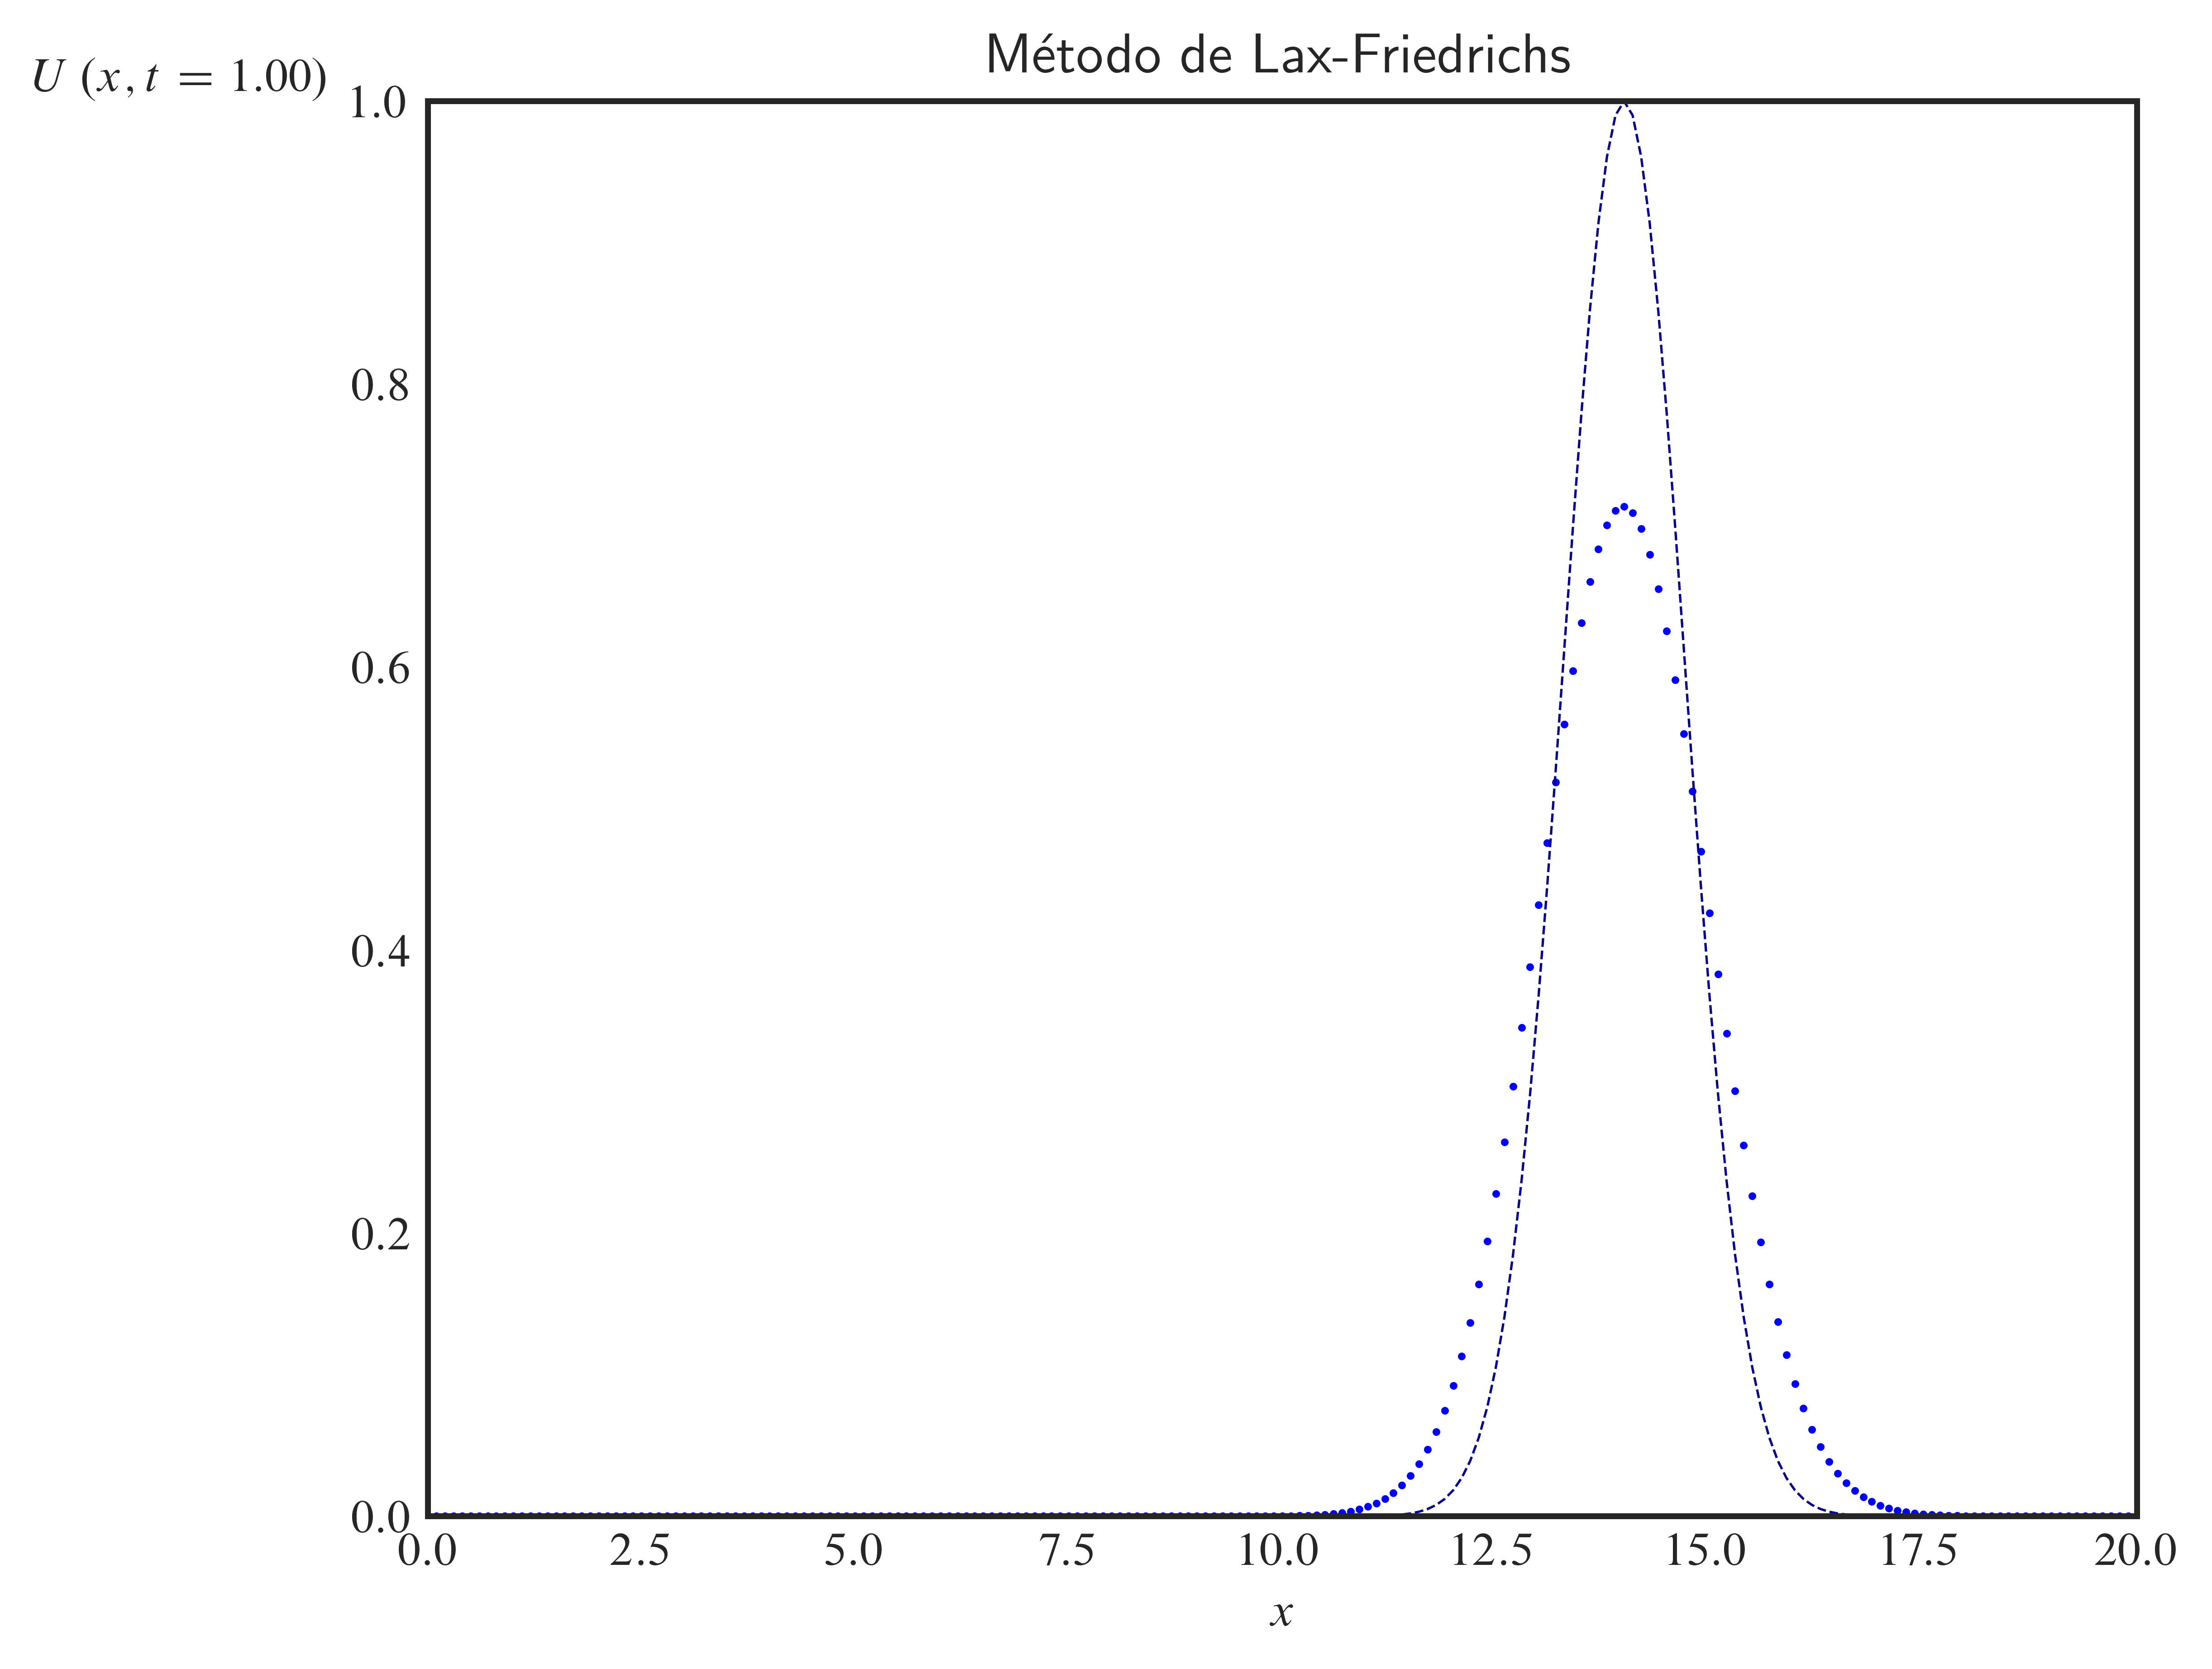

In [127]:
fig, ax = plt.subplots(layout="constrained")

(ln,) = ax.plot(
    [],
    [],
    color="DarkBlue",
    label="Exacta",
    linestyle="dashed",
    linewidth=0.5,
)

ln1 = ax.scatter(
    x=[],
    y=[],
    c="blue",
    label=rf"$\operatorname{{Co}}={cfl:.1f}$, $\Delta x={Δx:.3f}$",
    s=0.4,
)
ax.set_xlabel(xlabel=r"$x$")
ax.set_xlim(left=x[0], right=x[-1])
ax.set_ylim(bottom=0, top=1)
ax.set_title(label="Método de Lax-Friedrichs", loc="center")

U1 = U(x=x)


def init():
    ln.set_data(x, U(x))
    ln1.set_offsets(offsets=np.column_stack([x, U1]))

    return (ln,)


def update(frame):
    ln1.set_offsets(offsets=np.column_stack([x, U1]))
    ln.set_data(x, U(x=x - c * frame * Δt))
    U1[1:-1] = (
        0.5 * (np.roll(U1, -1) + np.roll(U1, 1))[1:-1]
        - 0.5 * cfl * (np.roll(U1, -1) - np.roll(U1, 1))[1:-1]
    )
    ax.set_ylabel(
        ylabel=rf"$U\left(x, t={frame * Δt:.2f}\right)$", loc="top", rotation=0
    )

    return (ln,)


anim = FuncAnimation(
    fig=fig,
    func=update,
    frames=tqdm(iterable=range(t.size), file=sys.stdout, colour="green"),
    interval=1,
    init_func=init,
    blit=True,
).save(
    filename="lax-friedrichs.gif",
    writer=FFMpegWriter(
        fps=90,
        codec="libx265",
        metadata={
            "subject": "Numerical Analysis",
            "title": "Exact solution",
            "author": "Gloria Almozara Sainz",
            "genre": "Mathematics",
            "copyright": "2025",
            "srcform": "Matplotlib 3.9.3",
            "comment": "Numerical Simulation for advection PDE",
        },
    ),
    dpi=300,
    savefig_kwargs={"transparent": True, "facecolor": "none"},
)

![](lax-friedrichs.gif)

**Método de Lax-Wendroff**

$$
U^{n+1}_{i}=
U^{n}_{i}-
c\frac{\Delta t}{2\Delta x}
\left(U^{n}_{i+1}-U^{n}_{i-1}\right)+
c^{2}
\frac{\Delta t^{2}}{2\Delta x^{2}}
\left(U^{n}_{i+1}-2U^{n}_{i}+U^{n}_{i-1}\right).
$$

  0%|          | 0/51 [00:00<?, ?it/s]

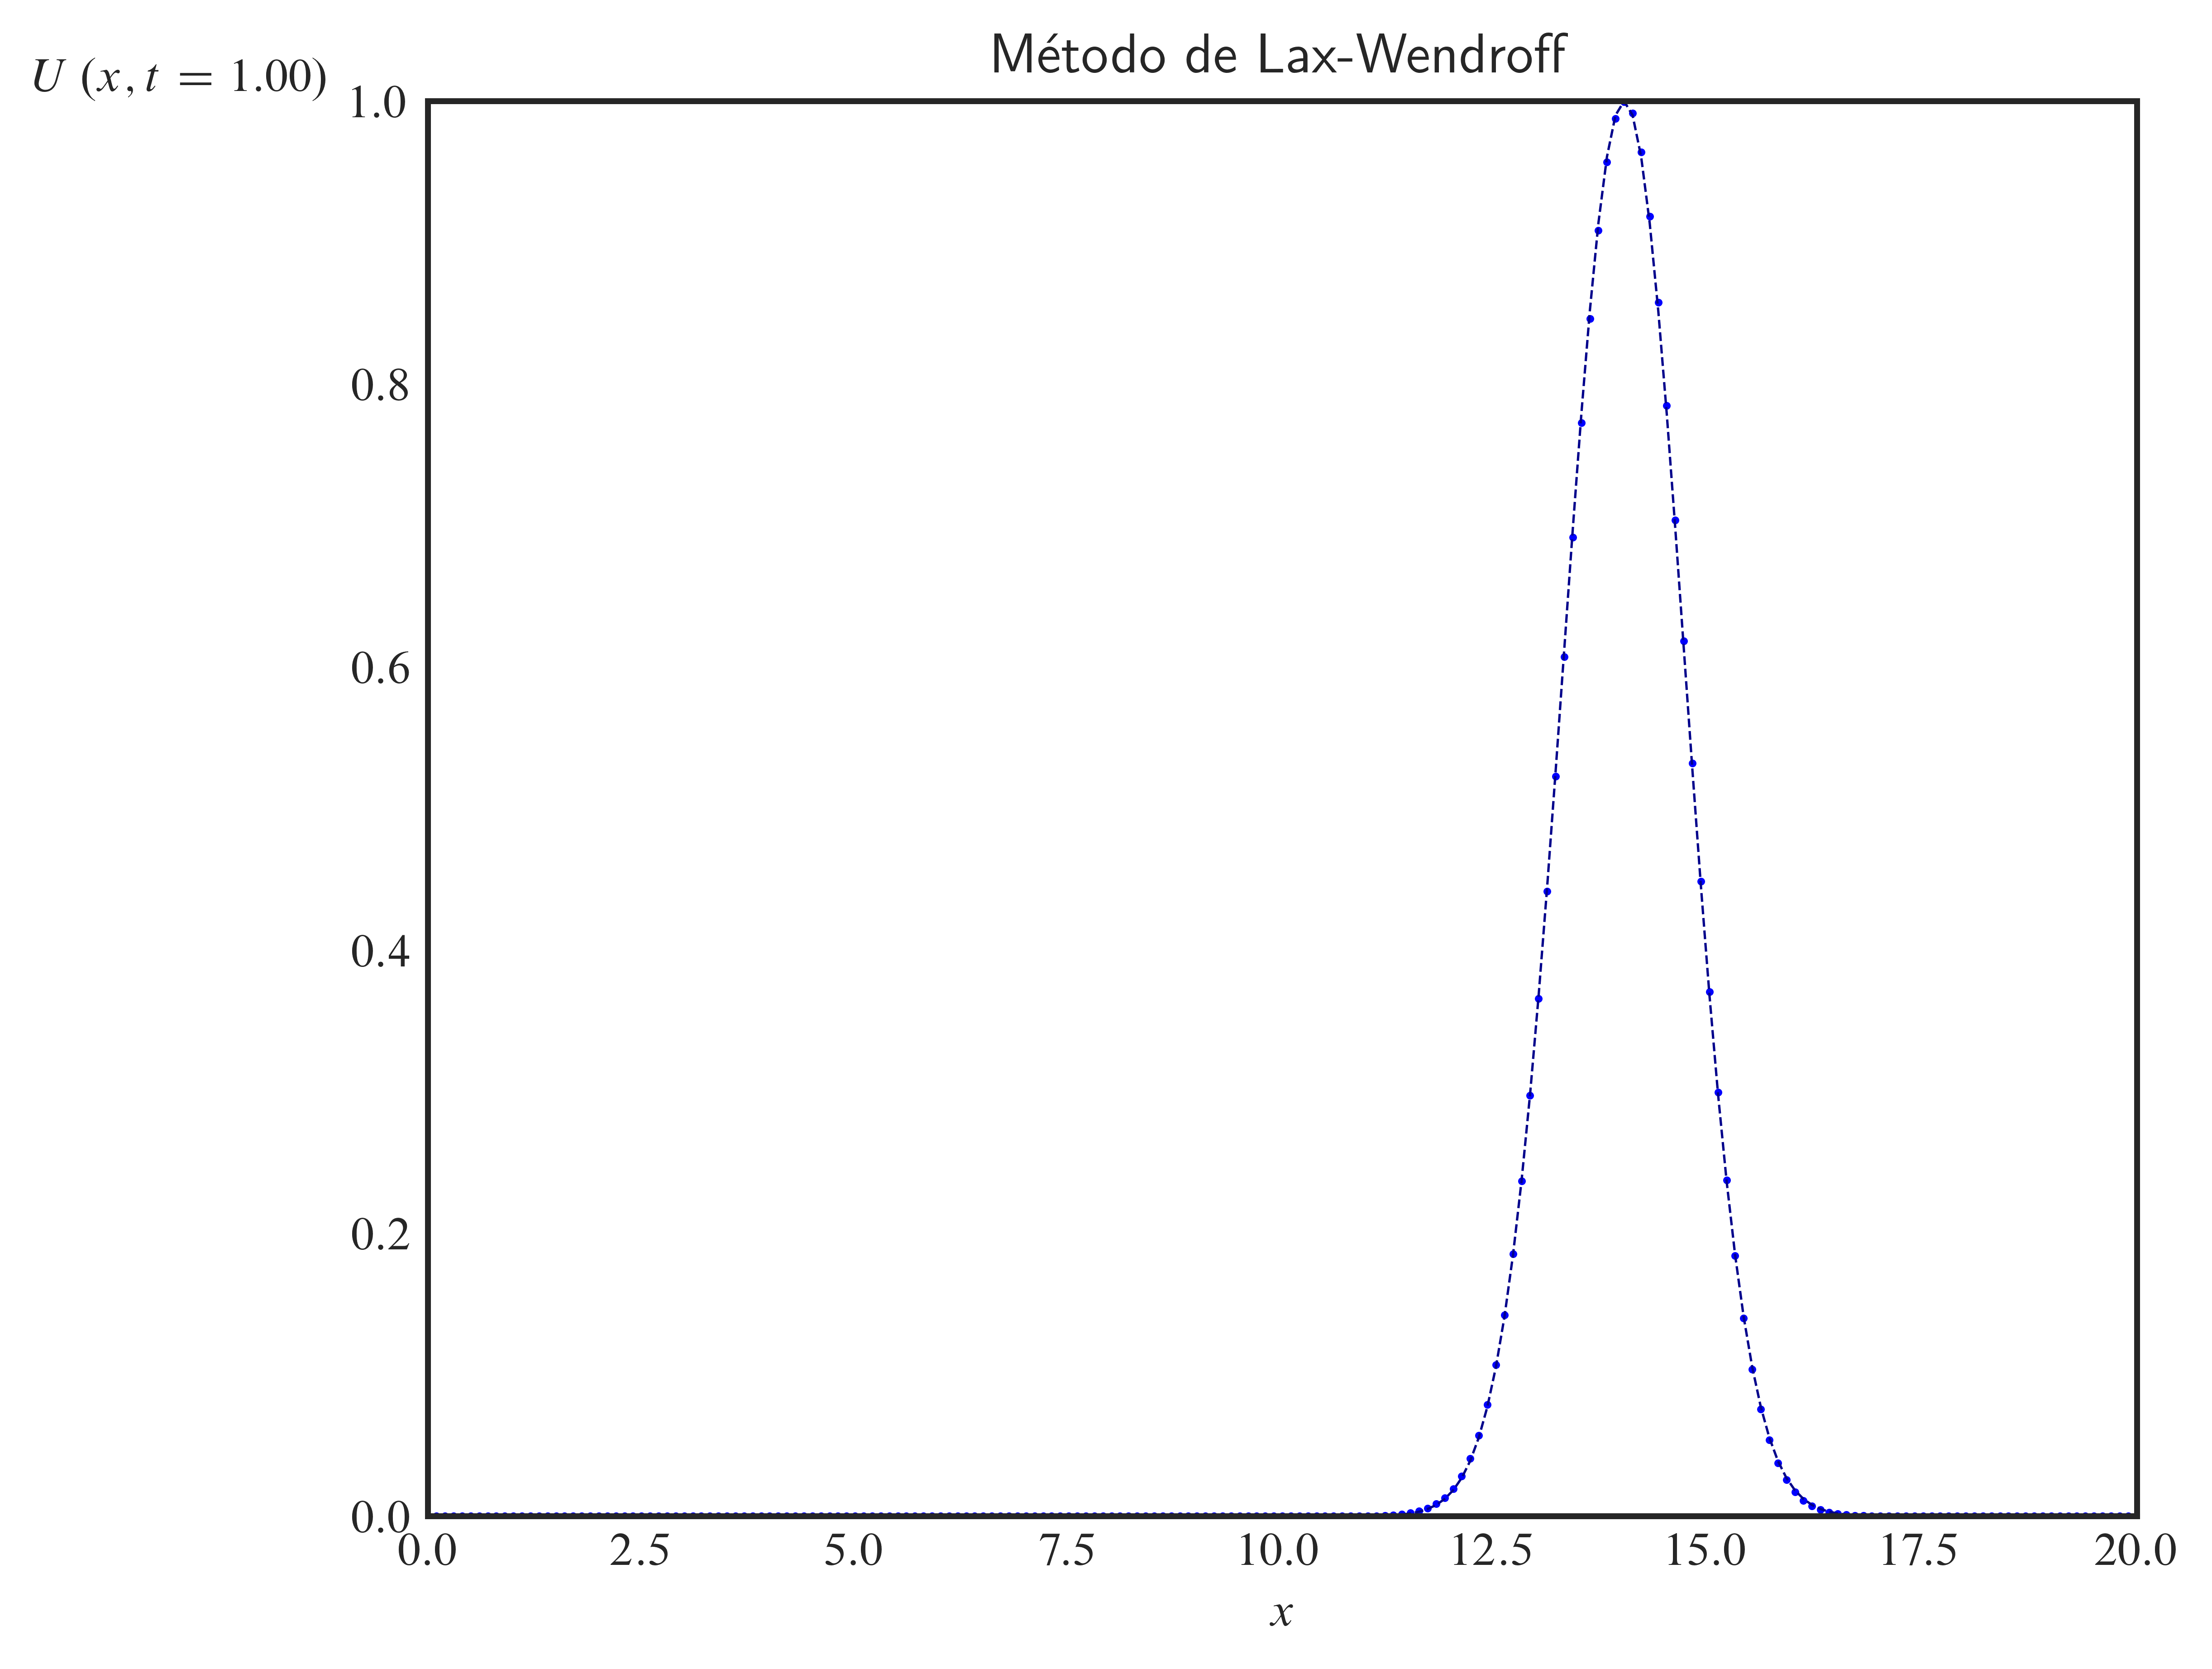

In [128]:
fig, ax = plt.subplots(layout="constrained")

(ln,) = ax.plot(
    [],
    [],
    color="DarkBlue",
    label="Exacta",
    linestyle="dashed",
    linewidth=0.5,
)

ln1 = ax.scatter(
    x=[],
    y=[],
    c="blue",
    label=rf"$\operatorname{{Co}}={cfl:.1f}$, $\Delta x={Δx:.3f}$",
    s=0.4,
)
ax.set_xlabel(xlabel=r"$x$")
ax.set_xlim(left=x[0], right=x[-1])
ax.set_ylim(bottom=0, top=1)
ax.set_title(label="Método de Lax-Wendroff", loc="center")

U1 = U(x=x)


def init():
    ln.set_data(x, U(x))
    ln1.set_offsets(offsets=np.column_stack([x, U1]))

    return (ln,)


def update(frame):
    ln1.set_offsets(offsets=np.column_stack([x, U1]))
    ln.set_data(x, U(x=x - c * frame * Δt))
    U1[1:-1] -= (
        0.5 * cfl * (np.roll(U1, -1) - np.roll(U1, 1))[1:-1]
        - 0.5 * cfl**2 * (np.roll(U1, -1) - 2 * U1 + np.roll(U1, 1))[1:-1]
    )
    ax.set_ylabel(
        ylabel=rf"$U\left(x, t={frame * Δt:.2f}\right)$", loc="top", rotation=0
    )

    return (ln,)


anim = FuncAnimation(
    fig=fig,
    func=update,
    frames=tqdm(iterable=range(t.size), file=sys.stdout, colour="green"),
    interval=1,
    init_func=init,
    blit=True,
).save(
    filename="lax-wendroff.gif",
    writer=FFMpegWriter(
        fps=90,
        codec="libx265",
        metadata={
            "subject": "Numerical Analysis",
            "title": "Exact solution",
            "author": "Gloria Almozara Sainz",
            "genre": "Mathematics",
            "copyright": "2025",
            "srcform": "Matplotlib 3.9.3",
            "comment": "Numerical Simulation for advection PDE",
        },
    ),
    dpi=300,
    savefig_kwargs={"transparent": True, "facecolor": "none"},
)

![](lax-wendroff.gif)

**Ejemplo $2$**

$\Omega=\left[0,30\right]$, $\Delta x=0.12$, $\Delta t=0.02$, $c=1$.

$$
U_{0}\left(x\right)=
\begin{cases}
2, & \text{ si }x<15,\\
1, & \text{ si }x>15.
\end{cases}
$$

In [129]:
def U(x):
    pass

# 6 Conclusiones y proyectos futuros